In [68]:
from sympy import *
import scipy
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
init_printing(use_latex='mathjax')

In [38]:
%matplotlib notebook

First let's look at some analytical properties

In [28]:
# Here are some symbolic variables
etaW = Symbol('eta_W')
sigma2W = Symbol('sigma^2_W')
sigma2G = Symbol('sigma^2_G')
Z2 = Symbol('Z^2')

In [29]:
# Getting the Weibull distribution
rhoW = etaW/(2*sigma2W)*(Z2/sigma2W)**(etaW-1)*exp(-(Z2/sigma2W)**etaW)
print(rhoW)
display(rhoW)

eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/(2*sigma^2_W)


                              η_W
                      ⎛  Z²  ⎞   
            η_W - 1  -⎜──────⎟   
    ⎛  Z²  ⎞          ⎝σ_W__2⎠   
η_W⋅⎜──────⎟       ⋅ℯ            
    ⎝σ_W__2⎠                     
─────────────────────────────────
             2⋅σ_W__2            

In [30]:
# Getting the Gaussian pdf in the limit eta=1
rhoG = rhoW.subs(etaW,1)
rhoG = rhoG.subs(sigma2W,sigma2G)
print(rhoG)
display(rhoG)

exp(-Z^2/sigma^2_G)/(2*sigma^2_G)


  -Z²   
 ────── 
 σ_G__2 
ℯ       
────────
2⋅σ_G__2

In [33]:
# Getting the slope of the Gaussian pdf
dlogrhoG_dZ2 = diff(log(rhoG),Z2)
print(dlogrhoG_dZ2)
display(dlogrhoG_dZ2)

-1/sigma^2_G


 -1   
──────
σ_G__2

In [34]:
# Getting the slope of the Weibull pdf
dlogrhoW_dZ2 = diff(log(rhoW),Z2)
print(dlogrhoW_dZ2)
display(dlogrhoW_dZ2)

2*sigma^2_W*(Z^2/sigma^2_W)**(-eta_W + 1)*(-eta_W**2*(Z^2/sigma^2_W)**eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/(2*Z^2*sigma^2_W) + eta_W*(Z^2/sigma^2_W)**(eta_W - 1)*(eta_W - 1)*exp(-(Z^2/sigma^2_W)**eta_W)/(2*Z^2*sigma^2_W))*exp((Z^2/sigma^2_W)**eta_W)/eta_W


                          ⎛                                             η_W   
                          ⎜                                     ⎛  Z²  ⎞      
                          ⎜               η_W         η_W - 1  -⎜──────⎟      
                          ⎜     2 ⎛  Z²  ⎞    ⎛  Z²  ⎞          ⎝σ_W__2⎠      
                 -η_W + 1 ⎜  η_W ⋅⎜──────⎟   ⋅⎜──────⎟       ⋅ℯ               
         ⎛  Z²  ⎞         ⎜       ⎝σ_W__2⎠    ⎝σ_W__2⎠                        
2⋅σ_W__2⋅⎜──────⎟        ⋅⎜- ────────────────────────────────────────────── + 
         ⎝σ_W__2⎠         ⎝                   2⋅Z²⋅σ_W__2                     
──────────────────────────────────────────────────────────────────────────────
                                                                   η_W        

                                        η_W⎞               
                                ⎛  Z²  ⎞   ⎟               
            η_W - 1            -⎜──────⎟   ⎟  ⎛        η_W⎞
    ⎛  Z²  ⎞                 

In [77]:
# Trying to get the slope of the Weibull pdf in the limit eta -> 1
etaWprime = Symbol('eta_Wprime')
dlogrhoW_dZ2_etaprime = dlogrhoW_dZ2.subs(etaW,1-etaWprime)
display(dlogrhoW_dZ2_etaprime)
dlogrhoW_dZ2_etaprime_taylor = series(dlogrhoW_dZ2_etaprime,etaWprime,n=2)
print(dlogrhoW_dZ2_etaprime_taylor)
display(dlogrhoW_dZ2_etaprime_taylor)

                      ⎛                                           -η_W′ + 1   
                      ⎜                                   ⎛  Z²  ⎞            
                      ⎜               -η_W′              -⎜──────⎟            
                      ⎜       ⎛  Z²  ⎞                    ⎝σ_W__2⎠            
                 η_W′ ⎜  η_W′⋅⎜──────⎟     ⋅(-η_W′ + 1)⋅ℯ                     
         ⎛  Z²  ⎞     ⎜       ⎝σ_W__2⎠                                        
2⋅σ_W__2⋅⎜──────⎟    ⋅⎜- ────────────────────────────────────────────────── - 
         ⎝σ_W__2⎠     ⎝                     2⋅Z²⋅σ_W__2                       
──────────────────────────────────────────────────────────────────────────────
                                                                             -

                                                       -η_W′ + 1⎞             
                                               ⎛  Z²  ⎞         ⎟             
        -η_W′         -η_W′ + 1               -⎜───

-1/sigma^2_W + eta_Wprime*(log(Z^2/sigma^2_W)/sigma^2_W + 1/sigma^2_W - 1/Z^2) + O(eta_Wprime**2)


                ⎛   ⎛  Z²  ⎞              ⎞           
                ⎜log⎜──────⎟              ⎟           
    1           ⎜   ⎝σ_W__2⎠     1      1 ⎟    ⎛    2⎞
- ────── + η_W′⋅⎜─────────── + ────── - ──⎟ + O⎝η_W′ ⎠
  σ_W__2        ⎝   σ_W__2     σ_W__2   Z²⎠           

Now for some numerical work

<IPython.core.display.Javascript object>


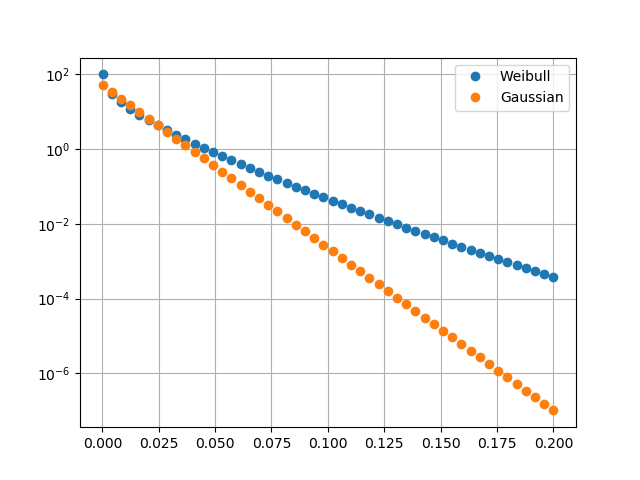

Approximation =  -99.99999999999999
Actual = -30.0998168651358


In [97]:
sigmaW_num = 0.1
sigma2W_num = sigmaW_num**2
etaW_num = 0.8
etaWprime_num = 1-etaW_num
Z2max_num = .2
Z2_num = np.linspace(0.0001,Z2max_num); #print(Z2_num)

# Set up the graph
plt.figure()

# This is the exact result, Weibull
rhoW_num = etaW_num*(Z2_num/sigma2W_num)**(etaW_num - 1)*np.exp(-(Z2_num/sigma2W_num)**etaW_num)/(2*sigma2W_num)
yW = np.log(rhoW_num)
plt.semilogy(Z2_num,np.exp(yW),'o',label='Weibull')

# This is the exact result, Gaussian
rhoG_num = np.exp(-(Z2_num/sigma2W_num))/(2*sigma2W_num)
yG = np.log(rhoG_num)
plt.semilogy(Z2_num,np.exp(yG),'o',label='Gaussian')

# Legend
plt.legend()

# This is an affine approximation of the slope
test = -1/sigma2W_num #+ etaWprime_num*(np.log(Z2max_num/sigma2W_num)/sigma2W_num + 1/sigma2W_num - 1/Z2max_num)
print('Approximation = ', test)
othertest = (y[-1]-y[-2])/(Z2_num[-1]-Z2_num[-2])
print('Actual =', othertest)

plt.grid(True)